In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

# sns.set_style("ticks")
sns.set_style("white")
# sns.set_style("whitegrid")

In [3]:
photoz_table = pd.read_csv("Fields-DR3/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'r_petro', 'odds'])

specz_table = pd.read_csv("hydra_specz.csv", usecols=['RA_1', 'DEC_1', 'z', 'r_petro'])

In [4]:
ra_pz = photoz_table["RA"]
dec_pz = photoz_table["DEC"]
zml = photoz_table["zml"]
rpetro_pz = photoz_table["r_petro"]
odds = photoz_table["odds"]

ra_sz = specz_table["RA_1"]
dec_sz = specz_table["DEC_1"]
z = specz_table["z"]
rpetro_sz = specz_table["r_petro"]

In [5]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances_pz = dist(ra_pz, dec_pz)
distances_sz = dist(ra_sz, dec_sz)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for ax, mlim in zip(axs.ravel(), [16, 17, 18, 19, 20, 21]):
    mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim)
    mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < 18)
    
    zml[mask_pz].hist(ax=ax, alpha=0.6, label='Photo-z', bins=50, histtype='stepfilled')
    z[mask_sz].hist(ax=ax, alpha=0.6, label='Spec-z', bins=50, histtype='stepfilled')
    
    ax.set_title("r_petro < {:.1f}".format(mlim), fontsize=25)
    ax.set_xlabel("Redshift", fontsize=25)
    ax.set_ylabel("Number of objects", fontsize=25)
    
    ax.yaxis.set_tick_params(labelsize=20, width=3)
    ax.xaxis.set_tick_params(labelsize=20, width=3)
    
    ax.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
    ax.axvline(x=0.025, linestyle='--', color='navy', linewidth=3.0)

fig.tight_layout()
plt.savefig("Plot-speczs-photozs.pdf", format='pdf')

In [6]:
from matplotlib import rc
# import matplotlib.font_manager
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["sans-serif"]})

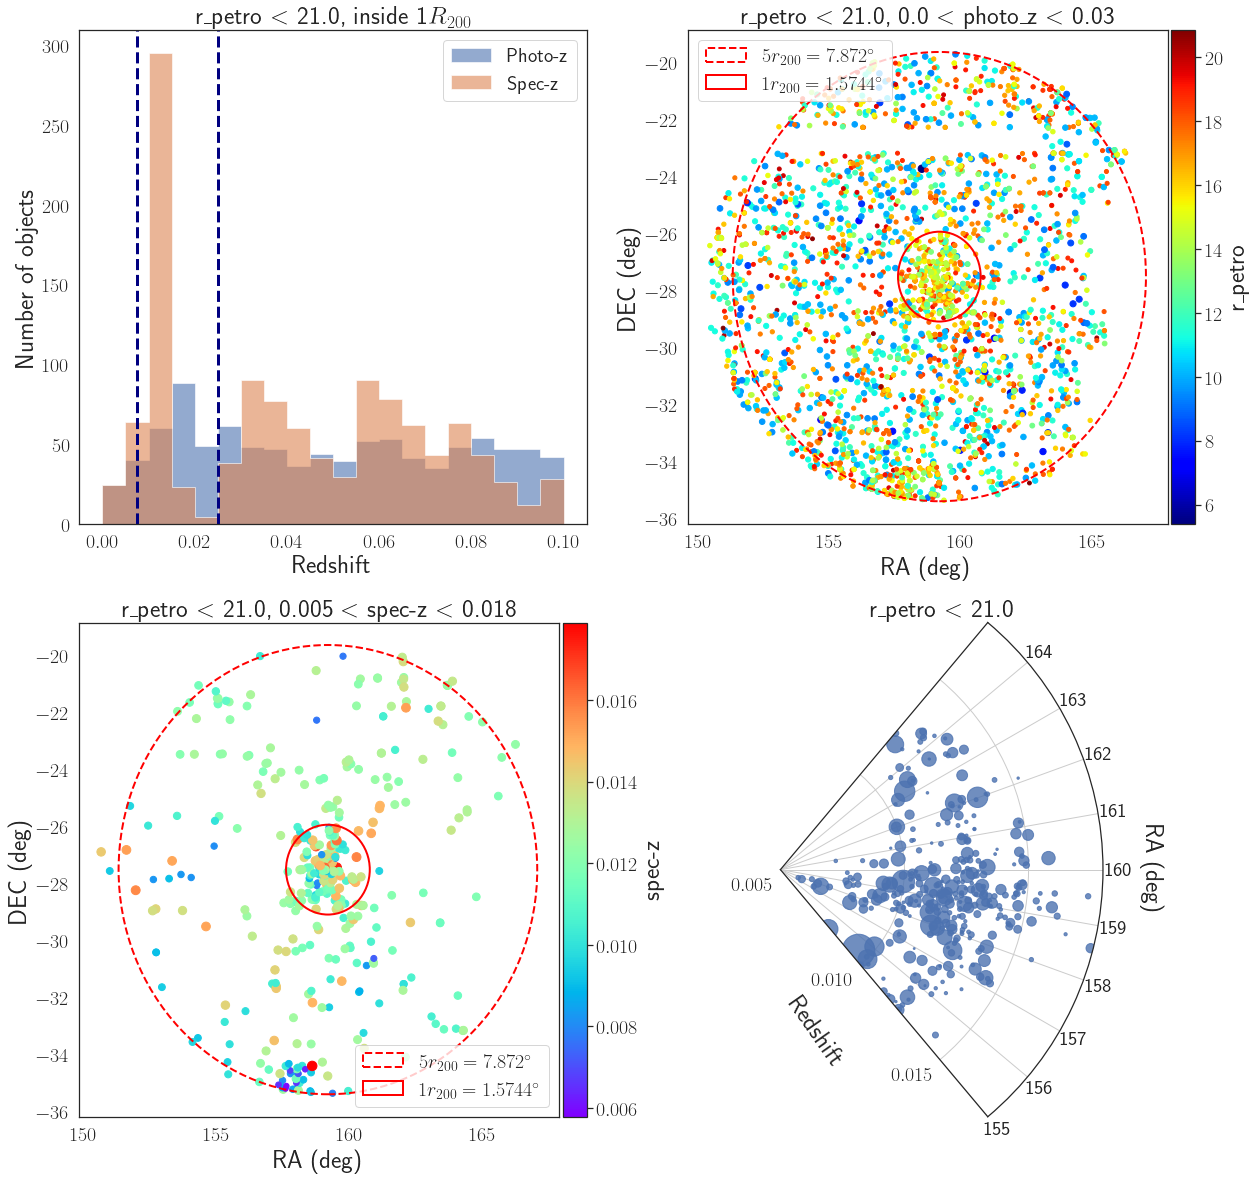

In [117]:
mlim = 21
odds_min = 0.7
z_range = 0.018

fontsize = 25
labelsize = 20

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224, projection='polar')


#======================================
#First figure: histogram of redshifts
#======================================

mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim) & (odds > odds_min)

ax1.hist(zml[mask_pz], alpha=0.6, label='Photo-z', bins=20, range=(0, 0.1), histtype='stepfilled')
ax1.hist(z[mask_sz], alpha=0.6, label='Spec-z', bins=20, range=(0, 0.1), histtype='stepfilled')
ax1.set_title(r'r_petro $ < $ {:.1f},'.format(mlim) + r' inside 1$R_{200}$', fontsize=fontsize)
ax1.set_xlabel("Redshift", fontsize=fontsize)
ax1.set_ylabel("Number of objects", fontsize=fontsize)
ax1.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
ax1.axvline(x=0.025, linestyle='--', color='navy', linewidth=3.0)
ax1.legend(fontsize=fontsize*0.8)


#======================================
#Second figure: RA x DEC distribution
#======================================

mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min)

sc1 = ax2.scatter(x=ra_pz[mask], y=dec_pz[mask], c=rpetro_pz[mask], cmap=cm1, s=(1/rpetro_pz[mask])*300)
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)
ax2.set_title(r"r_petro $<$ {:.1f}, 0.0 $<$ photo-z $<$ 0.03".format(mlim), fontsize=fontsize)

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_petro", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax2.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax2.add_patch(OneR200)

ax2.legend(fontsize=fontsize*0.8)

#======================================
#Third figure: RA x DEC distribution
#======================================

mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range)

sc1 = ax3.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax3.set_ylabel("DEC (deg)", fontsize=fontsize)
ax3.set_xlabel("RA (deg)", fontsize=fontsize)
ax3.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax3)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax3.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax3.add_patch(OneR200)

ax3.legend(fontsize=fontsize*0.8)


#======================================
#Fourth figure: cone diagram
#======================================

# Scale factor
sf = 10

mask_sz2 = (rpetro_sz < mlim)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax4.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax4.set_ylim(0.005, z_range)
ax4.set_yticks(np.arange(0.0050, z_range, 0.005))
ax4.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180, np.arange(155,  165, 1))
ax4.set_theta_offset(200*np.pi/180) # This offset is here to change the position of the slice
ax4.set_thetamax(sf*165)
ax4.set_thetamin(sf*155)

ax4.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax4.get_rlabel_position()
ax4.text(np.radians(label_position+60), ax4.get_rmax()*0.65,'Redshift', 
             rotation=-55, ha='center',va='center', fontsize=fontsize)
ax4.text(160*np.pi/180, z_range+0.002, 'RA (deg)', ha='center', va='center', rotation=270, fontsize=fontsize)
ax4.grid(True)

#======================================
#Global stuff
#======================================

for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
    ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
    
    
# fig.tight_layout()
plt.savefig("../Figures/z_raxdec_cone_mlim{:.1f}-v2.pdf".format(mlim), format='pdf')    

In [103]:
z_range

0.018